✅ Dataset Loaded Successfully!
Total Rows: 6485
Total Columns: 6
Columns: ['internship_title', 'company_name', 'location', 'start_date', 'duration', 'stipend']
Missing Values:
 internship_title    0
company_name        0
location            0
start_date          0
duration            0
stipend             0
dtype: int64


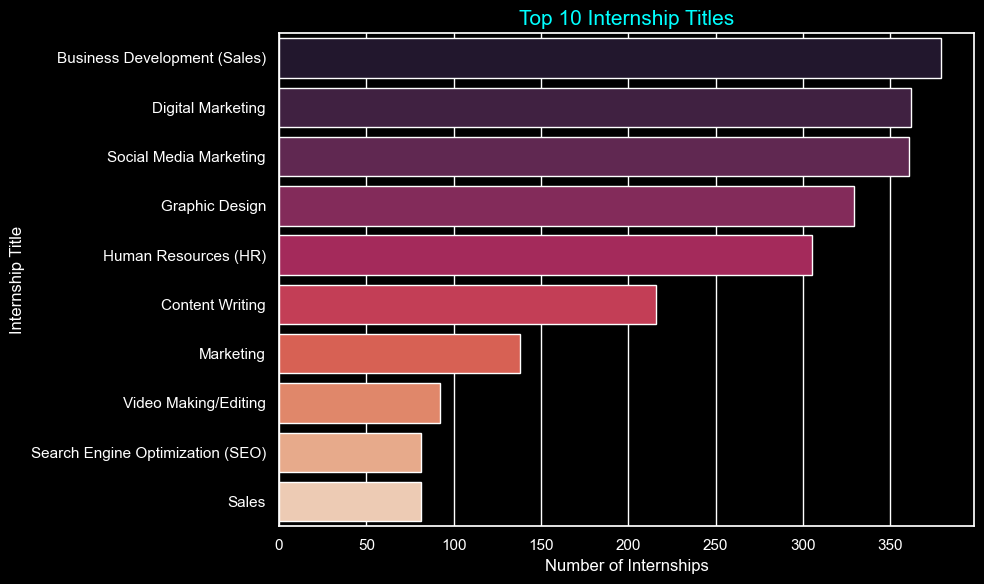

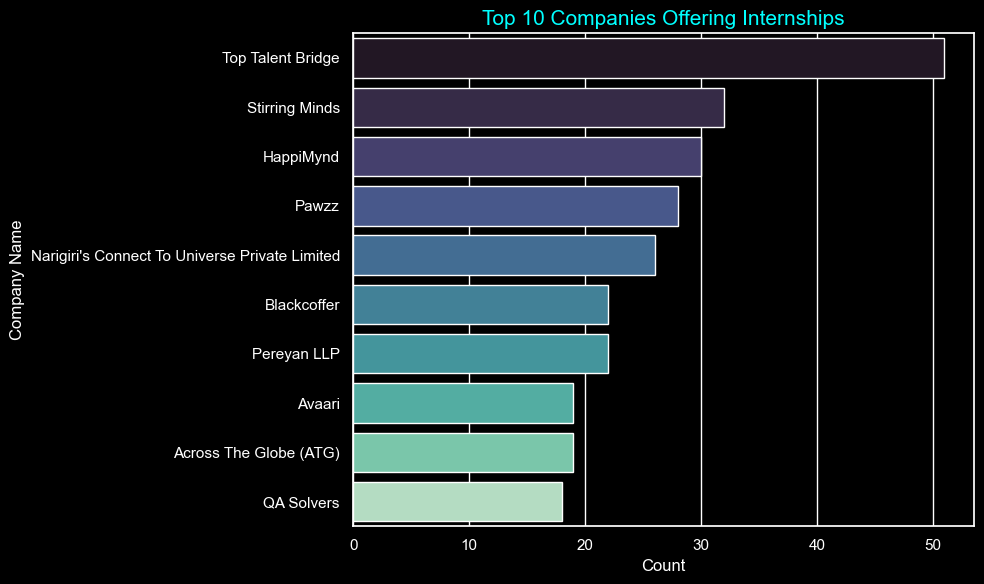

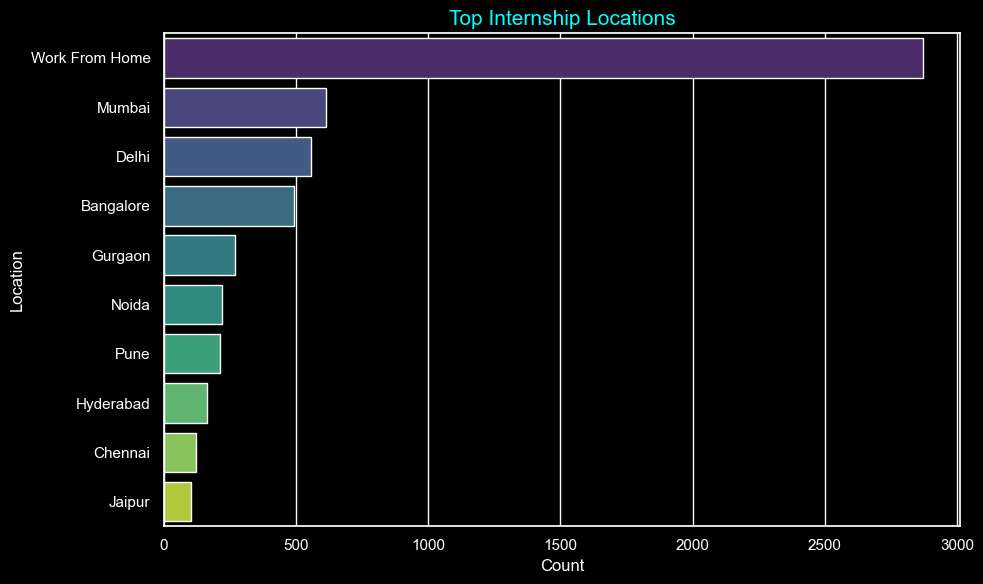

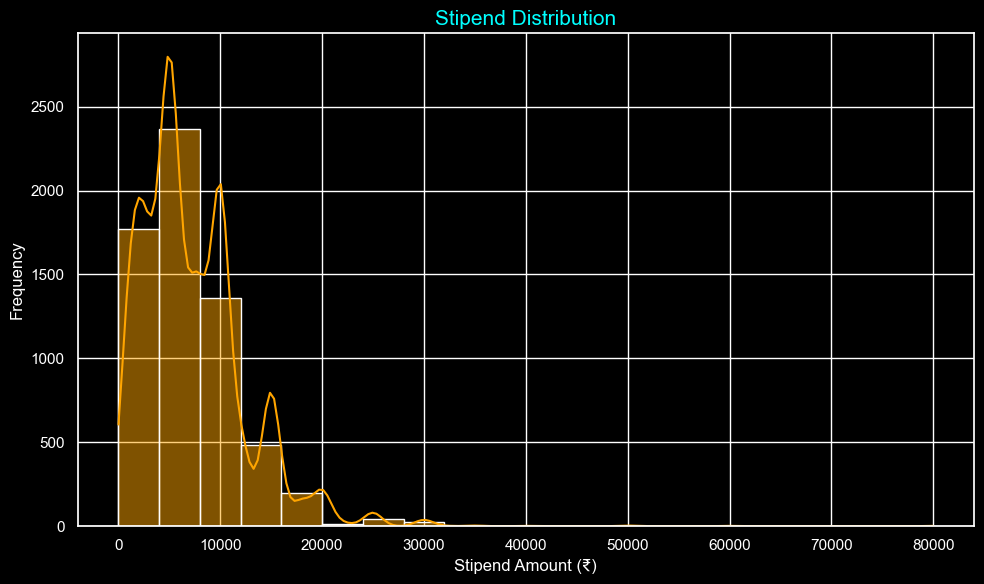

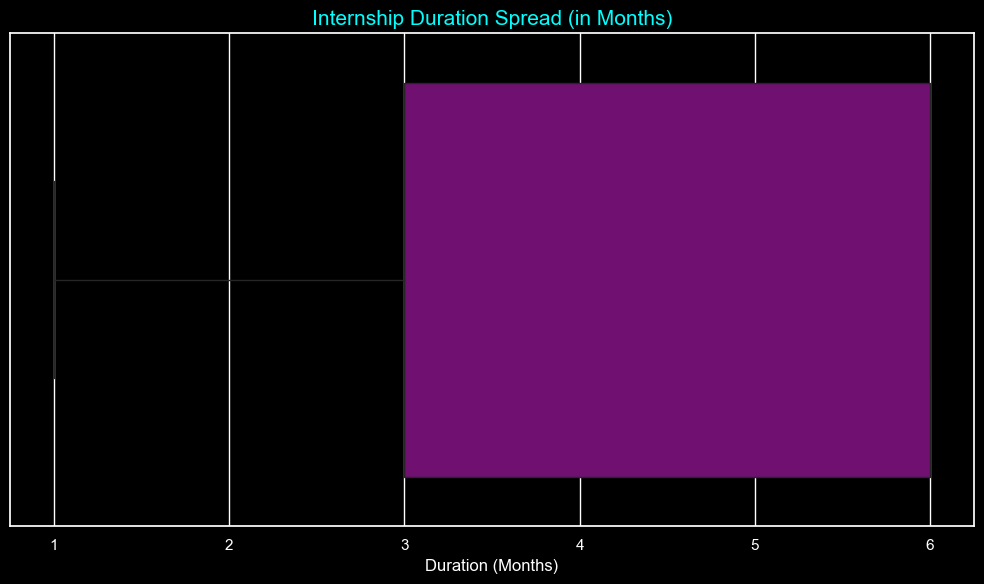

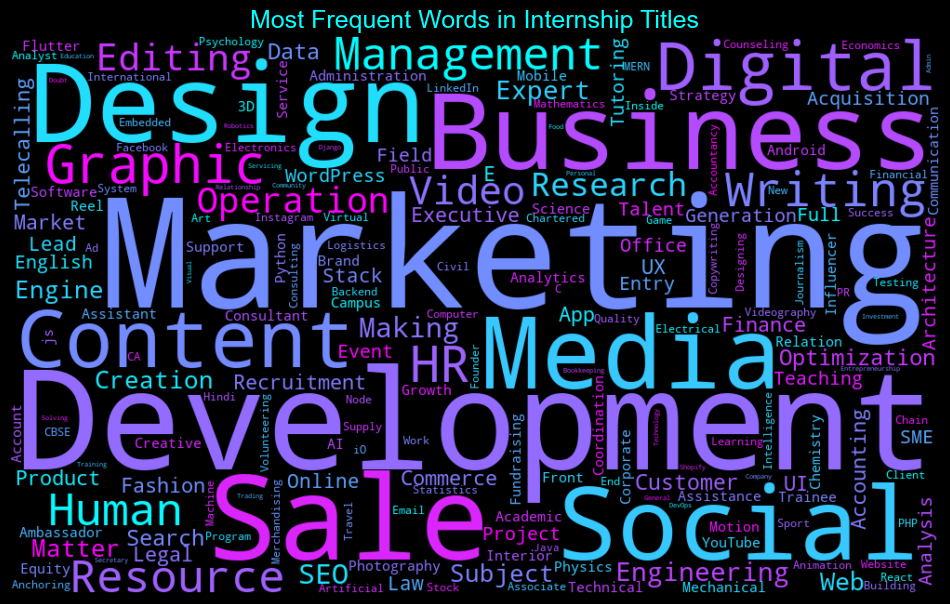

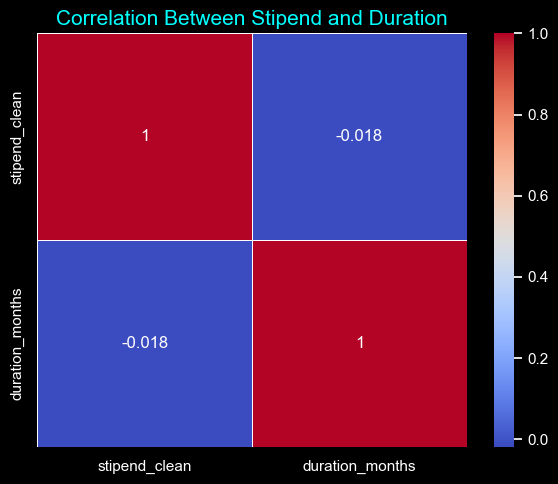


📈 Summary Insights:
🔹 Total Unique Companies: 4656
🔹 Total Unique Internship Titles: 2162
🔹 Average Stipend (₹): 7287.78
🔹 Average Internship Duration (months): 3.87

✅ Analysis Completed Successfully!


In [1]:
# 📊 Internship Program Analysis - Python Project
# ----------------------------------------------------
# Author: Abdullah Umar
# Task: Internship Program Analysis (Data Analytics Internship)
# Dataset: Internship Program Analysis DataSet.csv
# ----------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.ticker as mticker


# Load & Clean Dataset
df = pd.read_csv("C:/Users/Abdullah Umer/Desktop/Internee.pk Internship/Task 1/Internship Program Analysis DataSet.csv")

print("✅ Dataset Loaded Successfully!")
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])
print("Columns:", df.columns.tolist())
print("Missing Values:\n", df.isnull().sum())


# Clean Dates
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce', format='%Y-%m-%d')

# Extract Month for Analysis
df['month'] = df['start_date'].dt.month_name()



# 🎨 Visualizations
sns.set(style="darkgrid")
plt.style.use("dark_background")
colors = sns.color_palette("dark:#2ecc71", 10)


# 1. Internship Titles
title_counts = df['internship_title'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=title_counts.values, y=title_counts.index, hue=title_counts.index, palette="rocket", legend=False)
plt.title("Top 10 Internship Titles", fontsize=15, color='cyan')
plt.xlabel("Number of Internships", color='white')
plt.ylabel("Internship Title", color='white')
plt.tight_layout()
plt.show()


# 2. Top Companies
top_companies = df['company_name'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_companies.values, y=top_companies.index, hue=top_companies.index, palette="mako", legend=False)
plt.title("Top 10 Companies Offering Internships", fontsize=15, color='cyan')
plt.xlabel("Count", color='white')
plt.ylabel("Company Name", color='white')
plt.tight_layout()
plt.show()



# 3. Top Locations
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, hue=top_locations.index, palette="viridis", legend=False)
plt.title("Top Internship Locations", fontsize=15, color='cyan')
plt.xlabel("Count", color='white')
plt.ylabel("Location", color='white')
plt.tight_layout()
plt.show()



# 4. Stipend Distribution
# Clean stipend column for numeric analysis
df['stipend_clean'] = df['stipend'].str.replace('₹', '', regex=True).str.replace(',', '').str.extract(r'(\d+)')
df['stipend_clean'] = pd.to_numeric(df['stipend_clean'], errors='coerce')

plt.figure(figsize=(10,6))
sns.histplot(df['stipend_clean'].dropna(), bins=20, kde=True, color='orange')
plt.title("Stipend Distribution", fontsize=15, color='cyan')
plt.xlabel("Stipend Amount (₹)", color='white')
plt.ylabel("Frequency", color='white')
plt.tight_layout()
plt.show()



# 5. Internship Duration Analysis
df['duration_months'] = df['duration'].str.extract(r'(\d+)').astype(float)
plt.figure(figsize=(10,6))
sns.boxplot(x=df['duration_months'], color='purple')
plt.title("Internship Duration Spread (in Months)", fontsize=15, color='cyan')
plt.xlabel("Duration (Months)", color='white')
plt.tight_layout()
plt.show()



# 6. Word Cloud of Titles
text = " ".join(df['internship_title'].astype(str).tolist())
wordcloud = WordCloud(width=1000, height=600, background_color='black', colormap='cool', collocations=False).generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Internship Titles", fontsize=18, color='cyan')
plt.show()



# 7. Heatmap (Correlation)
corr_data = df[['stipend_clean', 'duration_months']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Stipend and Duration", fontsize=15, color='cyan')
plt.tight_layout()
plt.show()



# Summary Insights
print("\n📈 Summary Insights:")
print(f"🔹 Total Unique Companies: {df['company_name'].nunique()}")
print(f"🔹 Total Unique Internship Titles: {df['internship_title'].nunique()}")
print(f"🔹 Average Stipend (₹): {round(df['stipend_clean'].mean(), 2)}")
print(f"🔹 Average Internship Duration (months): {round(df['duration_months'].mean(), 2)}")
print("\n✅ Analysis Completed Successfully!")















